[('GOOGL', 'HD'), ('JNJ', 'V'), ('JNJ', 'PG'), ('JNJ', 'VZ'), ('JNJ', 'MA'), ('V', 'MA'), ('KO', 'DIS'), ('IBM', 'HD'), ('IBM', 'BA'), ('IBM', 'MA'), ('HD', 'MA')]


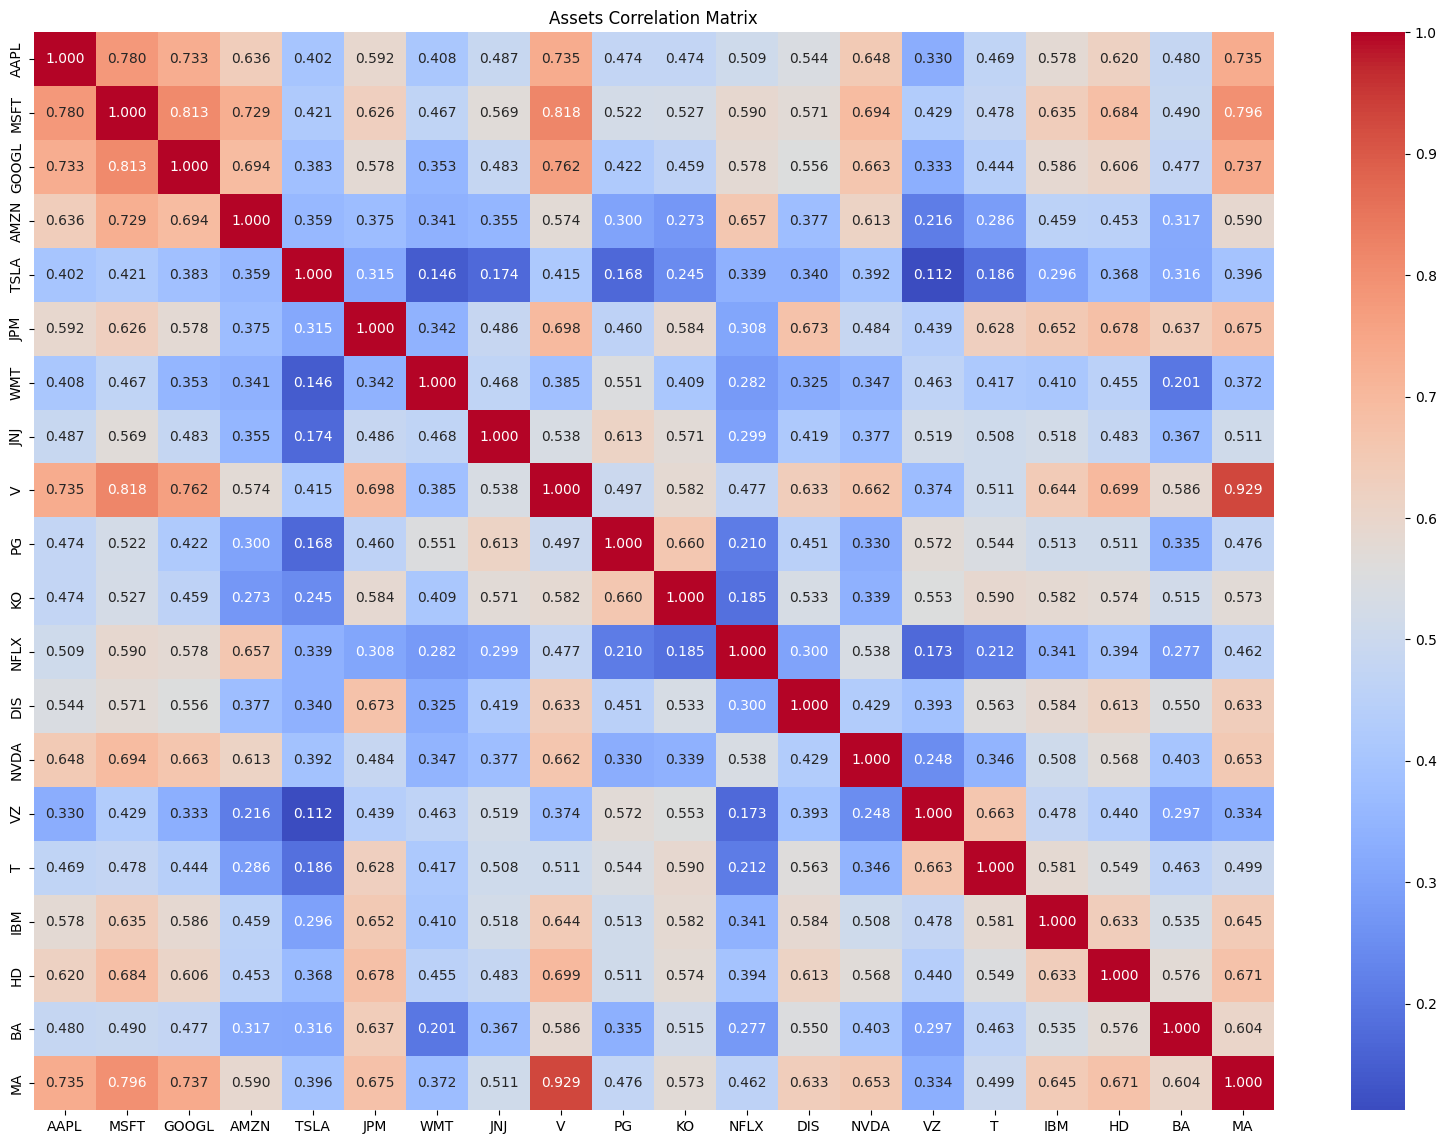

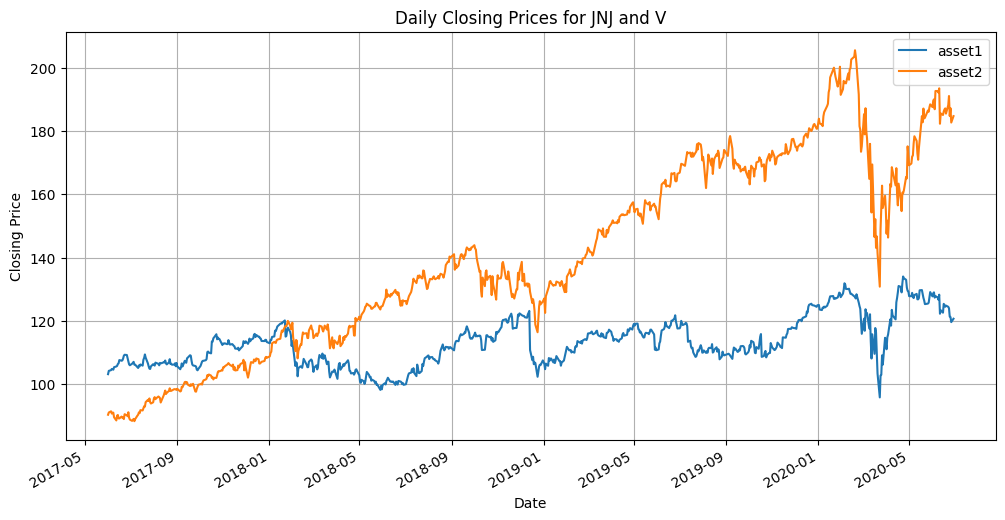

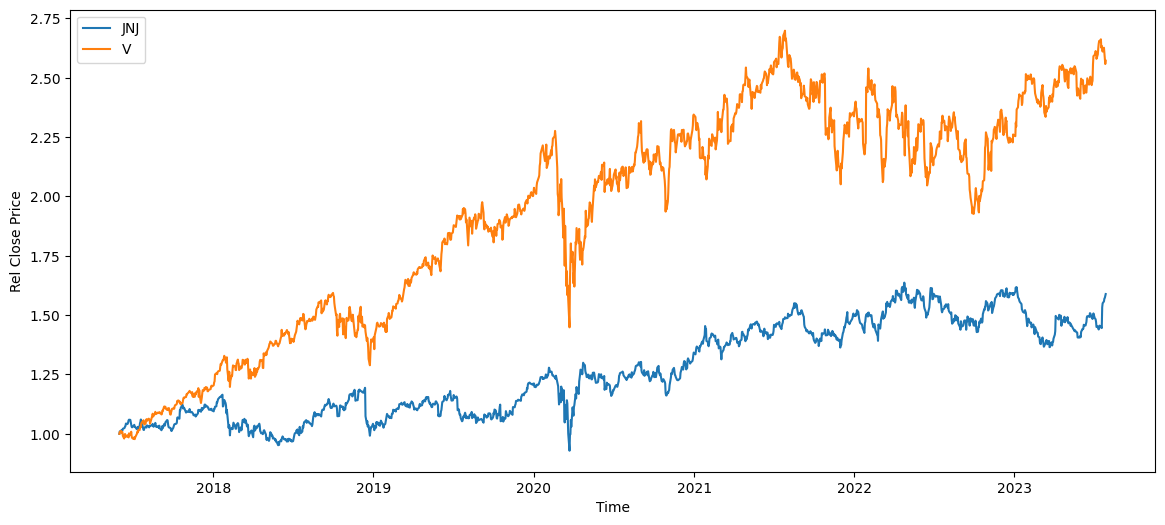

In [4]:
# -*- coding: utf-8 -*-
"""Stock_Selection.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1cnktYZPPpVwZiabCV0IDbLvVHCjbA989
"""

!pip install yfinance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

companies=pd.DataFrame()
stocks=["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "JPM", "WMT", "JNJ", "V", "PG", "KO", "NFLX", "DIS", "NVDA", "VZ", "T", "IBM", "HD","BA","MA"]
for stock in stocks:
    stk=yf.Ticker(stock)
    data=stk.history(start='2017-06-01',end='2023-07-31')
    companies[stock]=data['Close']
companies.head()

train_close, test_close = train_test_split(companies, test_size=0.5, shuffle=False)

fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".3f")
ax.set_title('Assets Correlation Matrix')

def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)

asset1,asset2='JNJ','V'
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]
ax = train[['asset1','asset2']].plot(figsize=(12, 6), title = 'Daily Closing Prices for {} and {}'.format(asset1,asset2))
ax.set_ylabel("Closing Price")
ax.grid(True);

plt.figure(figsize=(14, 6))
stock1_close_relative = companies[asset1] / companies[asset1].iloc[0]
stock2_close_relative = companies[asset2]/ companies[asset2].iloc[0]
plt.plot(stock1_close_relative , label = asset1 )
plt.plot(stock2_close_relative , label = asset2 )
plt.xlabel("Time")
plt.ylabel("Rel Close Price")
plt.legend()
plt.show()